# Pipeline_GridSearchCV

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Breast Cancer

In [4]:
np.random.seed(1)
wine = datasets.load_wine()
# print description
# print(cancer.DESCR)

In [5]:
# get the data
X = wine.data
y = wine.target

Podzielmy zbiór na część testową i treningową .

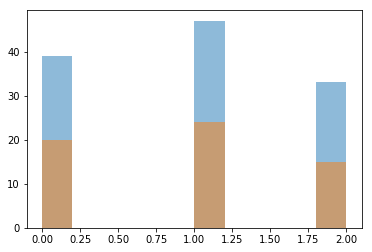

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy dla 

* LogisticRegression
* LinearSVC
* SVC
* KNeighborsClassifier
* DecisionTreeClassifier
* RandomForestClassifier
* BaggingClassifier
* ExtraTreesClassifier
* AdaBoostClassifier
* GradientBoostingClassifier
* VotingClassifier
* xgboost.XGBClassifier


In [7]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 1,
 'classifier__gamma': 0.01,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [15]:
from sklearn import  metrics


models = []
models.append(('SVM rbf', grid_1.best_estimator_))



precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test, model.predict(X_test), average='weighted') ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test), average='weighted') ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test), average='weighted') ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test), average='weighted'))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test), average='weighted'))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test), average='weighted'))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

SVM rbf
precision_score: 1.0
recall_score: 1.0
f1_score: 1.0
accuracy_score: 1.0


In [16]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM rbf'])
df

,Method,accuracy_score,f1_score,precision_score,recall_score
0,SVM rbf,1.0,1.0,1.0,1.0
